In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("file:///C:/Users/asus/Downloads/archive (4).zip")

In [4]:
df.head(4)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [8]:
df = df.drop(columns=['symbol', 'adjClose', 
                          'adjHigh', 'adjLow', 'adjOpen',
                          'adjVolume', 'divCash', 'splitFactor'], axis=1)

In [9]:
df.head()

,date,close,high,low,open,volume
0,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065
1,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517
2,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471
3,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357
4,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538


C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

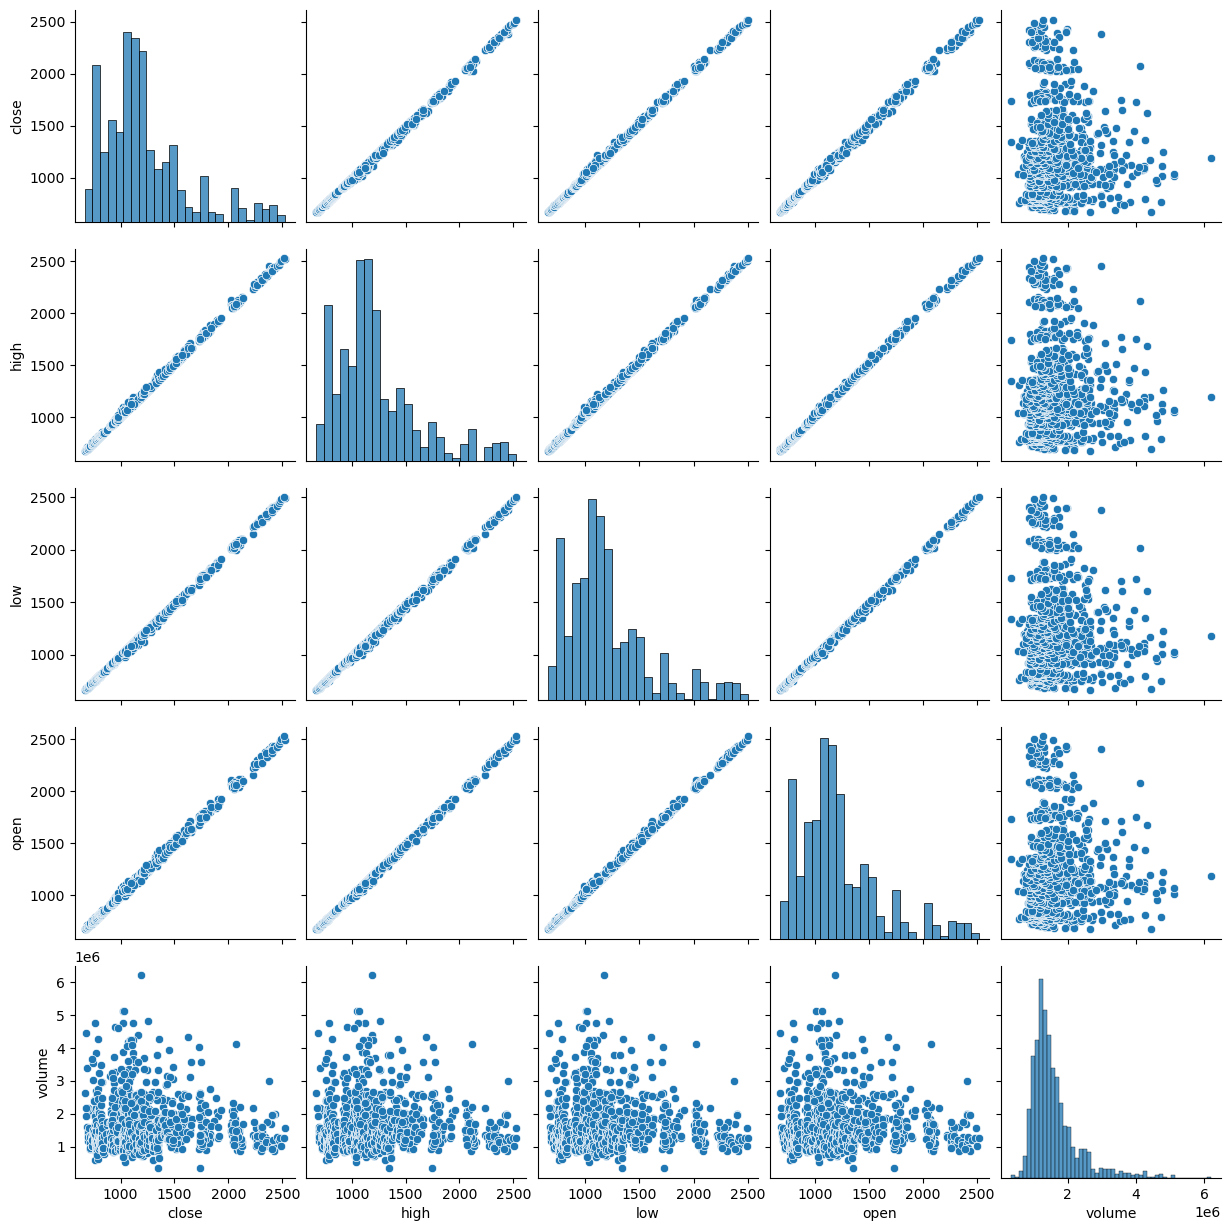

In [10]:
sns.pairplot(df)

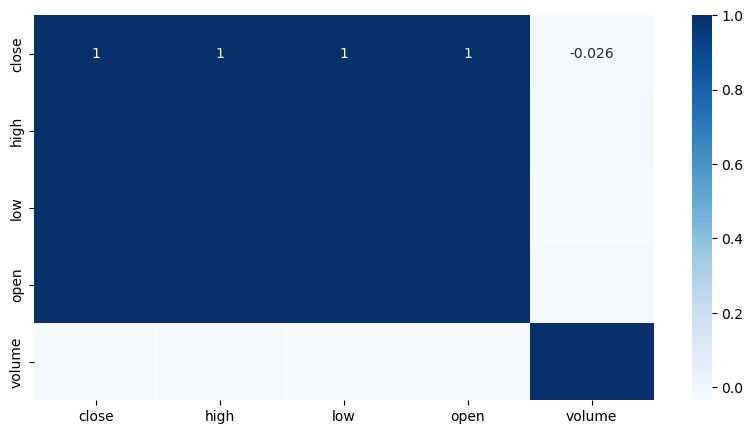

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), cmap='Blues', annot=True)
plt.show()

<Axes: >

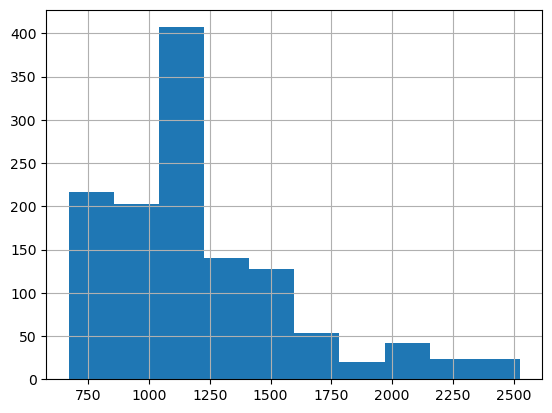

In [12]:
df['open'].hist()

<Axes: >

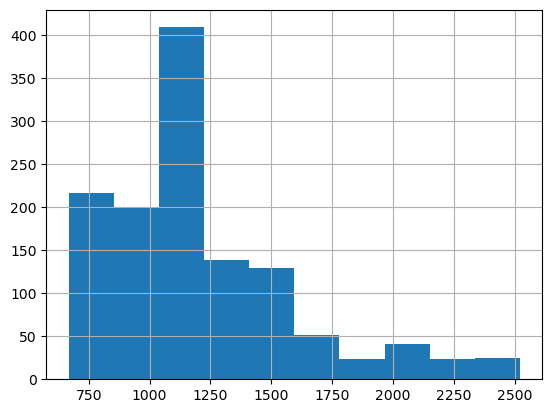

In [13]:
df['close'].hist()

<Axes: >

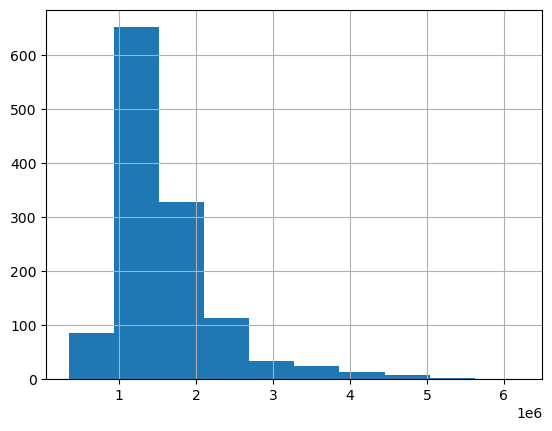

In [14]:
df['volume'].hist()

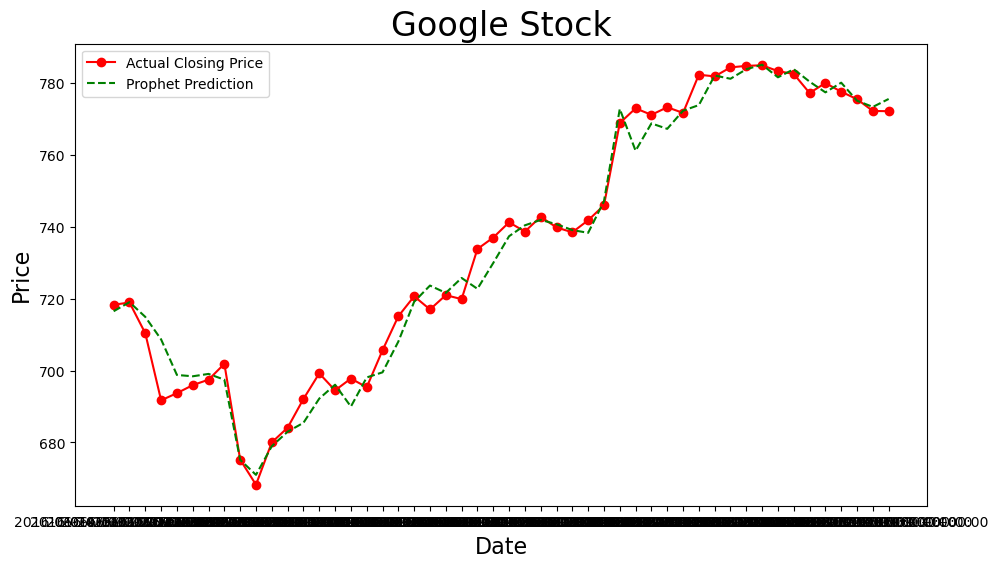

In [25]:
df_top_50 = df.head(50)

plt.figure(figsize=(11, 6))
plt.plot(df_top_50['date'], df_top_50['close'], '-o', label='Actual Closing Price', color='red')

# Plotting the Prophet predictions in blue
plt.plot(df_top_50['date'], df_top_50['open'], '--', label='Prophet Prediction', color='green')

plt.title('Google Stock', fontsize=24)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend()
plt.show()

In [16]:
X=df.drop(columns=['close', 'date']).values
y=df['close'].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
print(X_train.shape)
print(X_test.shape)

(1006, 4)
(252, 4)


In [19]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
from xgboost import XGBRegressor
from sklearn import metricsfrom xgboost import XGBRegressor
from sklearn import metrics

In [22]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred ))

Mean Absolute Error 7.320699375697541


In [55]:
metrics.r2_score(y_test, y_pred)

0.9992711433375729